---

_You are currently looking at **version 1.5** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Assignment 3 - More Pandas
This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. And of course, the discussion forums are open for interaction with your peers and the course staff.

### Question 1 (20%)
Load the energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`

Convert `Energy Supply` to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, 

e.g. 

`'Bolivia (Plurinational State of)'` should be `'Bolivia'`, 

`'Switzerland17'` should be `'Switzerland'`.

<br>

Next, load the GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

<br>

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries.*

In [2]:
import pandas as pd
import re
from functools import reduce

def answer_one():
    pd.options.display.float_format = '{:.2f}'.format
    
    energy = pd.read_excel('Energy Indicators.xls',  skiprows=17, skipfooter=38 , usecols=[2,3,4,5], names=['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable'])
    
    energy['Energy Supply']  = pd.to_numeric(energy['Energy Supply'], errors='coerce')*1000000
      
    pattern = '\d|\(.+'
    energy['Country'].replace(pattern, '', regex=True, inplace=True)
    dict_replace = {"Republic of Korea": "South Korea", "United States of America": "United States", "United Kingdom of Great Britain and Northern Ireland": "United Kingdom","China, Hong Kong Special Administrative Region": "Hong Kong"}
    energy.replace({'Country': dict_replace}, inplace=True) 
    
    energy['Country'] = energy['Country'].str.strip()
    energy = energy.set_index('Country')
    
    GDP = pd.read_csv('world_bank.csv', skiprows=4)
    dict_replace = {"Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran", "Hong Kong SAR, China": "Hong Kong"}
    GDP.replace({'Country Name' : dict_replace}, inplace=True)
    GDP = GDP.set_index('Country Name')
    
    ScimEn = pd.read_excel('scimagojr-3.xlsx')
    ScimEn = ScimEn.set_index('Country')
    #ScimEn = ScimEn[ScimEn['Rank'] <= 15]
    columns_to_keep =  ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
    #GDP = GDP[columns_to_keep]
    to_merge =  [energy, GDP, ScimEn]
    df_answer = reduce(lambda left, right: pd.merge(left, right, how='outer', left_index=True, right_index=True), to_merge)
    df_answer = df_answer[columns_to_keep]
    df_final_answer = df_answer[df_answer['Rank'] <= 15]
    return df_final_answer #.loc['Russia'] #df_final_answer # df_answer.shape df_final_answer #df_final_answer  #GDP #[GDP['Country Name'] == 'Iran']  #[energy['Country'] == 'South Korea'] 

#answer_one()

Rank  Documents  Citable documents  Citations  \
Australia          14.00    8831.00            8725.00   90765.00   
Brazil             15.00    8668.00            8596.00   60702.00   
Canada              6.00   17899.00           17620.00  215003.00   
China               1.00  127050.00          126767.00  597237.00   
France              9.00   13153.00           12973.00  130632.00   
Germany             7.00   17027.00           16831.00  140566.00   
India               8.00   15005.00           14841.00  128763.00   
Iran               13.00    8896.00            8819.00   57470.00   
Italy              11.00   10964.00           10794.00  111850.00   
Japan               3.00   30504.00           30287.00  223024.00   
Russian Federation  5.00   18534.00           18301.00   34266.00   
South Korea        10.00   11983.00           11923.00  114675.00   
Spain              12.00    9428.00            9330.00  123336.00   
United Kingdom      4.00   20944.00           20357.00  206091.00   
United States       2.00   96661.00           94747.00  792274.00   

                    Self-citations  Citations per document  H index  \
Australia                 15606.00                   10.28   107.00   
Brazil                    14396.00                    7.00    86.00   
Canada                    40930.00                   12.01   149.00   
China                    411683.00                    4.70   138.00   
France                    28601.00                    9.93   114.00   
Germany                   27426.00                    8.26   126.00   
India                     37209.00                    8.58   115.00   
Iran                      19125.00                    6.46    72.00   
Italy                     26661.00                   10.20   106.00   
Japan                     61554.00                    7.31   134.00   
Russian Federation        12422.00                    1.85    57.00   
South Korea               22595.00                    9.57   104.00   
Spain                     23964.00                   13.08   115.00   
United Kingdom            37874.00                    9.84   139.00   
United States            265436.00                    8.20   230.00   

                     Energy Supply Energy Supply per Capita  % Renewable  \
Australia            5386000000.00                      231        11.81   
Brazil              12149000000.00                       59        69.65   
Canada              10431000000.00                      296        61.95   
China              127191000000.00                       93        19.75   
France              10597000000.00                      166        17.02   
Germany             13261000000.00                      165        17.90   
India               33195000000.00                       26        14.97   
Iran                 9172000000.00                      119         5.71   
Italy                6530000000.00                      109        33.67   
Japan               18984000000.00                      149        10.23   
Russian Federation  30709000000.00                      214        17.29   
South Korea         11007000000.00                      221         2.28   
Spain                4923000000.00                      106        37.97   
United Kingdom       7920000000.00                      124        10.60   
United States       90838000000.00                      286        11.57   

                                2006              2007              2008  \
Australia           1021939264106.67  1060340245233.55  1099643871866.03   
Brazil              1845079664513.56  1957118136056.33  2056809174052.93   
Canada              1564468853329.45  1596739898466.32  1612713061250.24   
China               3992331462570.89  4559041383517.93  4997775145605.96   
France              2607839735099.34  2669423841059.60  2674637086092.71   
Germany             3332890754966.89  3441560834437.09  3478809377483.44   
India               126589432

### Question 2 (6.6%)
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [40]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text  x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [ ]:
def answer_two():
    return 302

## Answer the following questions in the context of only the top 15 countries by Scimagojr Rank (aka the DataFrame returned by `answer_one()`)

### Question 3 (6.6%)
What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [6]:
import numpy as np
def answer_three():
    Top15 = answer_one()
    data = Top15[['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
    df = data.apply(lambda x: np.mean(x) , axis=1)
    return df

#answer_three()

Australia             1164042729991.43
Brazil                2189794143774.91
Canada                1660647466307.51
China                 6348608932836.10
France                2681724635761.59
Germany               3493025339072.85
India                 1769297396603.86
Iran                   444155754051.09
Italy                 2120175089933.78
Japan                 5542207638235.18
Russian Federation    1565459478480.66
South Korea           1106714508244.85
Spain                 1418078278145.69
United Kingdom        2487906661418.42
United States        15364344302990.00
dtype: float64

### Question 4 (6.6%)
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [23]:
def answer_four():
    Top15 = answer_one()
    data = Top15[['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
    Top15['avg'] = data.apply(lambda x: np.mean(x) , axis=1)
    Top15['gdp_delta'] =  Top15['2015']-Top15['2006']
    Top15.sort_values(by='avg', ascending=False,inplace=True)
    return Top15.iloc[5]['gdp_delta']

#answer_four()

246702696075.3999

### Question 5 (6.6%)
What is the mean `Energy Supply per Capita`?

*This function should return a single number.*

In [32]:
def answer_five():
    Top15 = answer_one()
    
    return Top15['Energy Supply per Capita'].mean()

#answer_five()

157.59999999999999

### Question 6 (6.6%)
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [47]:
def answer_six():
    Top15 = answer_one()
    Top15.sort_values(by='% Renewable', ascending=False,inplace=True)
    Top15['Name'] = Top15.index
    return (Top15.iloc[0]['Name'], Top15.iloc[0]['% Renewable'])  #['% Renewable']#Top15.iloc[5]['% Renewable']

#answer_six()

('Brazil', 69.648030000000006)

### Question 7 (6.6%)
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [5]:
def answer_seven():
    Top15 = answer_one()
    Top15['ratio'] = Top15['Self-citations']/Top15['Citations']
    
    return (Top15['ratio'].idxmax(axis=1), Top15['ratio'].max())

#answer_seven()

('China', 0.68931261793894216)

### Question 8 (6.6%)

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return a single string value.*

In [19]:
def answer_eight():
    Top15 = answer_one()
    Top15['pop_est'] = Top15['Energy Supply']/Top15['Energy Supply per Capita']
    Top15.sort_values(by='pop_est', ascending=False,inplace=True)    
    return Top15.iloc[2].name

#answer_eight()

'United States'

### Question 9 (6.6%)
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [37]:
def answer_nine():
    Top15 = answer_one()
    # need to scale down the population, otherwise number of citabled documents is 0
    Top15['pop_est'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita'] #(Top15['Energy Supply']/Top15['Energy Supply per Capita'])/1000 
    Top15['citable_docs_per_person'] = Top15['Citable documents']/Top15['pop_est']
    
    return Top15[['citable_docs_per_person', 'Energy Supply']].corr(method ='pearson').iloc[0]['Energy Supply']

#answer_nine()

1.0

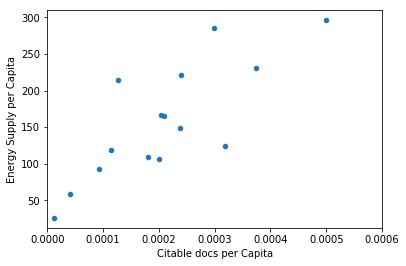

In [36]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])



In [ ]:
#plot9() # Be sure to comment out plot9() before submitting the assignment!

### Question 10 (6.6%)
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [5]:
def answer_ten():
    Top15 = answer_one()
    ren_med = Top15['% Renewable'].median()
    Top15['HighRenew'] = Top15['% Renewable'].apply(lambda x: 1 if x>= ren_med else 0) 
    #another way of creating conditional column
    Top15.loc[Top15['% Renewable'] >= ren_med, 'HighRenew1'] = 1
    Top15.loc[Top15['% Renewable'] < ren_med, 'HighRenew1'] = 0
    Top15.sort_values(by='Rank', ascending=True,inplace=True)    
    return Top15['HighRenew']

#answer_ten()

China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int64

### Question 11 (6.6%)
Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [3]:
import numpy as np
import pandas as pd
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}

def answer_eleven():
    Top15 = answer_one()
    Top15['Continent'] = Top15.index #.map(ContinentDict)
    Top15['Continent'] = Top15['Continent'].map(ContinentDict)
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15 = Top15.set_index('Continent')
    #Top15 = Top15.groupby('Continent').agg({'PopEst': ['sum']})
    #Top15 = Top15.groupby(level=0)['PopEst'].agg({'sum': np.sum, 'avg': np.average})
    Top15['PopEst'] = pd.to_numeric(Top15['PopEst'])
    #Top15 = Top15.groupby('Continent').std()  #agg({'PopEst': ['sum', 'mean', 'count']})
    'std is nan for continents with only 1 country'
    Top15 = Top15.groupby(level=0)['PopEst'].agg({'size': 'count', 'sum': np.sum, 'mean': np.mean, 'std': np.std})
    return  Top15

#answer_eleven()

size           sum         mean          std
Continent                                                  
Asia              5 2898666386.61 579733277.32 679097888.37
Australia         1   23316017.32  23316017.32          nan
Europe            6  457929667.22  76321611.20  34647667.07
North America     2  352855249.48 176427624.74 199669644.86
South America     1  205915254.24 205915254.24          nan

### Question 12 (6.6%)
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a __Series__ with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [57]:
def answer_twelve():
    Top15 = answer_one()
    Top15['Continent'] = Top15.index #.map(ContinentDict)
    Top15['Continent'] = Top15['Continent'].map(ContinentDict)
    #Top15.set_index(['Continent', Top15.index], inplace=True)
    bins = pd.cut(Top15['% Renewable'], 5)
    
    Top15.set_index(['Continent', bins], inplace=True)
    Top15 = Top15['Rank']
    #Top15 = Top15.groupby(['Continent', bins ])['% Renewable'].agg(['count'])
    Top15 = Top15.groupby(level=[0,1]).agg(['count'])
    Top15 = Top15['count']
    return Top15

#answer_twelve()

Continent      % Renewable     
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
Australia      (2.212, 15.753]     1
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
North America  (2.212, 15.753]     1
               (56.174, 69.648]    1
South America  (56.174, 69.648]    1
Name: count, dtype: int64

### Question 13 (6.6%)
Convert the Population Estimate series to a string with thousands separator (using commas). Do not round the results.

e.g. 317615384.61538464 -> 317,615,384.61538464

*This function should return a Series `PopEst` whose index is the country name and whose values are the population estimate string.*

In [10]:
def answer_thirteen():
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['PopEst'] = Top15.apply(lambda x: "{:,}".format(x['PopEst']), axis=1)
    Top15 = Top15['PopEst']
    Top15 = Top15.astype(str)
    return Top15

#answer_thirteen()

Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Canada                  35,239,864.86486486
China                 1,367,645,161.2903225
France                  63,837,349.39759036
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
Iran                    77,075,630.25210084
Italy                  59,908,256.880733944
Japan                  127,409,395.97315437
Russian Federation            143,500,000.0
South Korea            49,805,429.864253394
Spain                    46,443,396.2264151
United Kingdom         63,870,967.741935484
United States          317,615,384.61538464
Name: PopEst, dtype: object

### Optional

Use the built in function `plot_optional()` to see an example visualization.

In [12]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


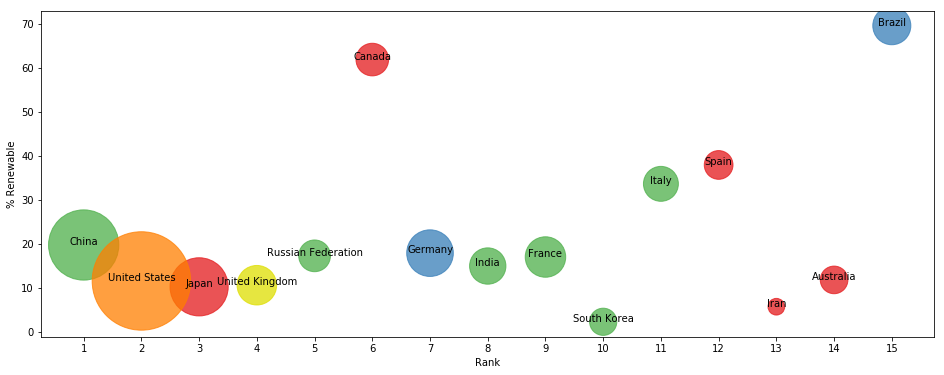

In [13]:
#plot_optional() # Be sure to comment out plot_optional() before submitting the assignment!